In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import zipfile
import os

# extract Zip file

In [2]:
zip_path = r'C:\Users\krunal sheth\Downloads\adult.zip'
extract_to = 'exctraced_files_adult'

with zipfile.ZipFile(zip_path,'r')as zip_ref:
    zip_ref.extractall(extract_to)

print(f'files extract to: {extract_to}')

files extract to: exctraced_files_adult


In [3]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

In [4]:
data = pd.read_csv(r'exctraced_files_adult/adult.data', names = columns,na_values = " ?")
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
test = pd.read_csv(r'exctraced_files_adult/adult.test',header = 1, na_values = " ?",names = columns)
test.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [6]:
df = pd.concat([data,test],ignore_index=True)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [8]:
df.duplicated().sum()

29

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.dropna(axis = 0, inplace = True)

In [11]:
df.shape

(45193, 15)

In [12]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [13]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [14]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [17]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [19]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
# LabelEncoder for categ.columns

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [22]:
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['education'] = labelencoder.fit_transform(df['education'])
df['marital-status'] = labelencoder.fit_transform(df['marital-status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['race'] = labelencoder.fit_transform(df['race'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native-country'] = labelencoder.fit_transform(df['native-country'])

In [23]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K


In [24]:
df['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [25]:
df['income'] = df['income'].str.strip().str.replace('.','')

In [26]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

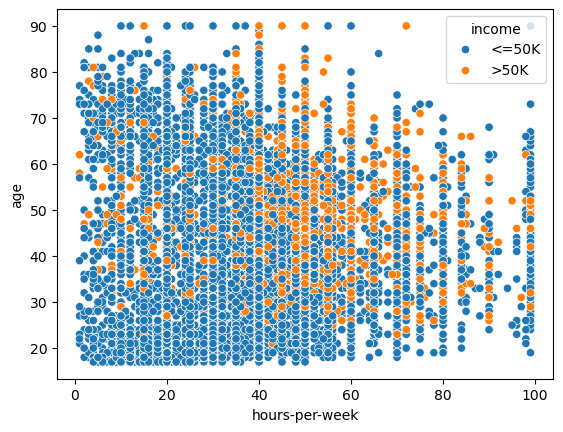

In [27]:
sns.scatterplot(data = df, x= 'hours-per-week',y = 'age',hue = 'income')
plt.show()

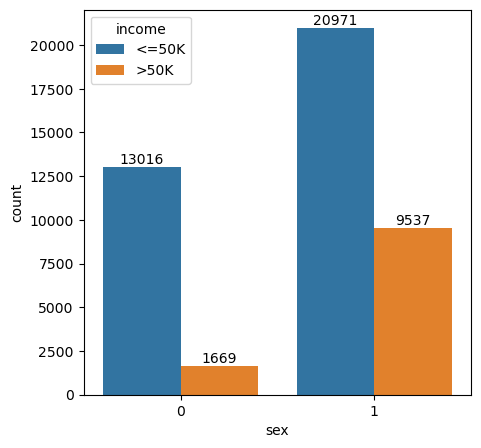

In [28]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'sex',hue = 'income',data = df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [30]:
df['income'].value_counts()

income
<=50K    33987
>50K     11206
Name: count, dtype: int64

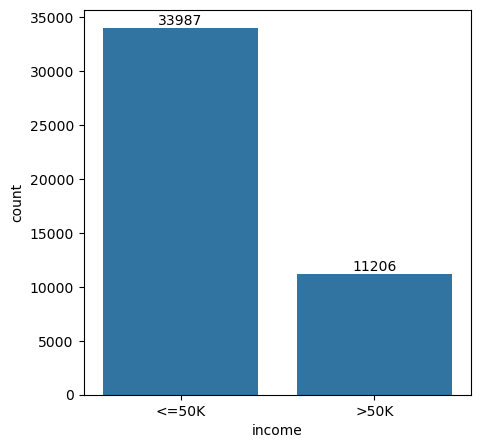

In [31]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'income', data = df)
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
y = df['income']
x = df.iloc[:,:-1]

# For imbalance data

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x,y)

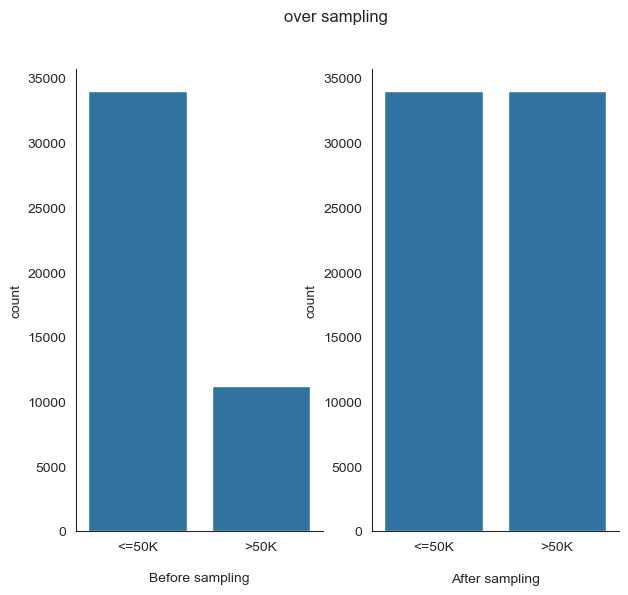

In [34]:
sns.set_style("white")
plt.figure(figsize = (7,6))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'income')
plt.xticks([0,1],['<=50K','>50K'])
plt.xlabel('\nBefore sampling')

plt.subplot(1,2,2)
sns.countplot(data = df, x = y_smote)
plt.xticks([0,1],['<=50K','>50K'])
plt.xlabel('\nAfter sampling')

plt.suptitle('over sampling \n\n\n')
sns.despine()

# logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_train

array([[-0.42900139,  3.13630351,  0.0374488 , ...,  3.26056405,
        -0.21144253,  0.26750217],
       [ 1.95817282,  3.13630351,  0.84914829, ..., -0.25694617,
        -1.64717801,  0.26750217],
       [-1.08753221, -0.13326284,  0.30596079, ..., -0.25694617,
         0.2372248 ,  0.26750217],
       ...,
       [ 0.55879484, -0.13326284, -0.41395904, ..., -0.25694617,
         0.32695827,  0.26750217],
       [-0.26436868, -0.13326284, -0.11967759, ..., -0.25694617,
         5.08283204,  0.26750217],
       [ 0.72342754, -0.13326284, -0.62187434, ..., -0.25694617,
        -0.21144253,  0.26750217]])

In [38]:
x_scaled_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [40]:
lr.fit(x_scaled_train,y_train)

LogisticRegression(random_state=42)

In [41]:
lr.score(x_scaled_train,y_train)

0.7699291734095542

In [42]:
lr.score(x_scaled_test,y_test)

0.7740891482371401

In [43]:
# prediction

In [44]:
pre = scaler.transform([[42,2,159449,9,13,2,3,0,4,1,5178,0,40,38]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.14721308, -0.13326284, -0.28747715, -0.39565996,  1.04432067,
        -0.28598561, -0.78707884, -0.72789562,  0.38360037,  0.6607756 ,
         0.29888961, -0.25694617, -0.21144253,  0.26750217]])

In [45]:
lr.predict([[0.14435986, -0.13140945, -0.28590215, -0.39751314,  1.04407402,
        -0.28456212, -0.7842714 , -0.73063825,  0.38514684,  0.66041458,
         0.30261925, -0.25933019, -0.21153446,  0.26797403]])

array(['>50K'], dtype=object)

# RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy import stats

In [47]:
# Random search for 20 combinations of parameters

rand_list = {"C": stats.uniform(2,10)}

rand_search = RandomizedSearchCV(lr, param_distributions = rand_list , n_iter = 20, n_jobs = 4, cv = 3, random_state = 42)

In [48]:
rand_search.fit(x_scaled_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023491C1CAD0>},
                   random_state=42)

In [49]:
rand_search.score(x_scaled_train, y_train)

0.7699712069943885

# Grid search CV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
model = LogisticRegression()

In [52]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [53]:
grid_model = GridSearchCV(model, param_grid = param_grid)

In [54]:
# grid_model.fit(x_scaled_train, y_train)

In [55]:
# grid_model.score(x_scaled_train, y_train) ---0.76997

# confusion matrix

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

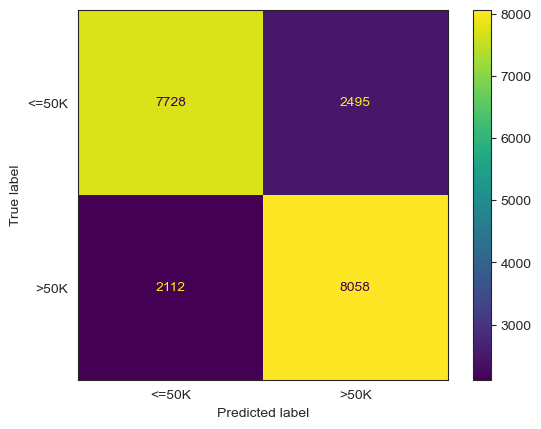

In [57]:
ConfusionMatrixDisplay.from_estimator(lr, x_scaled_test, y_test)
plt.show()

In [58]:
y_pred = lr.predict(x_scaled_test)
y_pred

array(['>50K', '<=50K', '>50K', ..., '>50K', '>50K', '>50K'], dtype=object)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.76      0.77     10223
        >50K       0.76      0.79      0.78     10170

    accuracy                           0.77     20393
   macro avg       0.77      0.77      0.77     20393
weighted avg       0.77      0.77      0.77     20393



# naive_bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
naive_bayes = GaussianNB()

In [62]:
naive_bayes.fit(x_scaled_train,y_train)

GaussianNB()

In [63]:
naive_bayes.score(x_scaled_train,y_train)

0.7096740295496101

In [64]:
naive_bayes.score(x_scaled_test,y_test)

0.7150983180503114

In [65]:
# confusion matrix

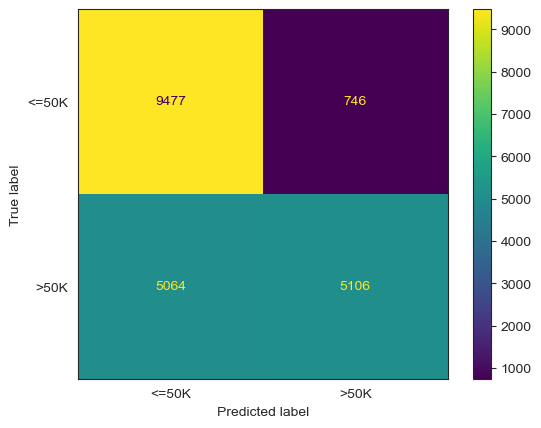

In [66]:
ConfusionMatrixDisplay.from_estimator(naive_bayes, x_scaled_test, y_test)
plt.show()

In [67]:
y_pred = naive_bayes.predict(x_scaled_test)
y_pred

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.65      0.93      0.77     10223
        >50K       0.87      0.50      0.64     10170

    accuracy                           0.72     20393
   macro avg       0.76      0.71      0.70     20393
weighted avg       0.76      0.72      0.70     20393



# RandomizedSearchCV

In [69]:
# Random search for 20 combinations of parameters

rand_list = {"var_smoothing": np.logspace(-11,-7,50)}

rand_search = RandomizedSearchCV(naive_bayes, param_distributions = rand_list , n_iter = 20, n_jobs = 4, cv = 3, random_state = 42)

In [70]:
rand_search.fit(x_scaled_train, y_train)

RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=20, n_jobs=4,
                   param_distributions={'var_smoothing': array([1.00000000e-11, 1.20679264e-11, 1.45634848e-11, 1.75751062e-11,
       2.12095089e-11, 2.55954792e-11, 3.08884360e-11, 3.72759372e-11,
       4.49843267e-11, 5.42867544e-11, 6.55128557e-11, 7.90604321e-11,
       9.54095476e-11, 1.15139540e-10, 1.38949549e-10, 1.67683294e-10,...
       9.10298178e-10, 1.09854114e-09, 1.32571137e-09, 1.59985872e-09,
       1.93069773e-09, 2.32995181e-09, 2.81176870e-09, 3.39322177e-09,
       4.09491506e-09, 4.94171336e-09, 5.96362332e-09, 7.19685673e-09,
       8.68511374e-09, 1.04811313e-08, 1.26485522e-08, 1.52641797e-08,
       1.84206997e-08, 2.22299648e-08, 2.68269580e-08, 3.23745754e-08,
       3.90693994e-08, 4.71486636e-08, 5.68986603e-08, 6.86648845e-08,
       8.28642773e-08, 1.00000000e-07])},
                   random_state=42)

In [71]:
rand_search.score(x_scaled_train, y_train)

0.7096740295496101

# Grid search CV 

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
model = GaussianNB()

In [74]:
param_grid = {'var_smoothing': [1e-11,1e-10,1e-9,1e-8,1e-7]}

In [75]:
grid_model = GridSearchCV(model, param_grid = param_grid)

In [76]:
grid_model.fit(x_scaled_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07]})

In [77]:
grid_model.score(x_scaled_train, y_train)

0.7096740295496101

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(x_scaled_train, y_train)

KNeighborsClassifier()

In [81]:
knn.score(x_scaled_train,y_train)

0.8957567096109792

In [82]:
knn.score(x_scaled_test,y_test)

0.8439170303535527

In [83]:
# prediction

In [84]:
knn.predict([[1.29870512, -1.21734932,  0.26721339, -0.39938805,  1.04747628,
        -0.28618133,  1.59441956, -0.72629522,  0.38896419,  0.65811814,
        -0.19684329, -0.25553885, -0.2143402 ,  0.2687333 ]])

array(['>50K'], dtype=object)

In [85]:
pre = scaler.transform([[30,5,141297,9,13,2,9,0,1,1,0,0,40,18]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.84058315,  3.13630351, -0.46201715, -0.39565996,  1.04432067,
        -0.28598561,  0.80278333, -0.72789562, -3.41654311,  0.6607756 ,
        -0.19720744, -0.25694617, -0.21144253, -3.24716645]])

In [86]:
knn.predict([[-0.87172863,  3.10621472, -0.46255733, -0.39207266,  1.03689308,
        -0.27644254,  0.83243962, -0.72440885, -3.39264803,  0.66115408,
        -0.19252189, -0.24251458, -0.20971926, -3.26511691]])

array(['>50K'], dtype=object)

In [87]:
# confusion matrix

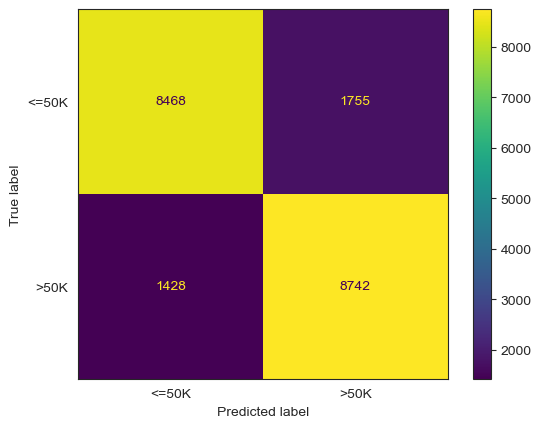

In [88]:
ConfusionMatrixDisplay.from_estimator(knn, x_scaled_test, y_test)
plt.show()

# RandomizedSearchCV

In [89]:
from scipy.stats import randint
param_dist = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [90]:
rand_search = RandomizedSearchCV(knn, param_distributions = param_dist , n_iter = 20, n_jobs = 4, cv = 3, random_state = 42)

In [91]:
# rand_search.fit(x_scaled_train, y_train)

In [92]:
# rand_search.score(x_scaled_train, y_train)

In [93]:
# rand_search.score(x_scaled_test, y_test)

# Grid search CV

In [94]:
model = KNeighborsClassifier()

In [95]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [96]:
grid_model = GridSearchCV(model, param_grid = param_grid)

In [97]:
# grid_model.fit(x_scaled_train, y_train)

In [98]:
# grid_model.score(x_scaled_train, y_train)

In [99]:
# grid_model.score(x_scaled_test, y_test)

# SVM

In [100]:
random_sample = df.sample(n=8000, random_state=42)

In [101]:
Ry = random_sample['income']
Rx = random_sample.iloc[:,:-1]

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
Rx_smote, Ry_smote = smote.fit_resample(Rx,Ry)

In [103]:
from sklearn.model_selection import train_test_split
Rx_train, Rx_test, Ry_train, Ry_test = train_test_split(Rx_smote, Ry_smote, test_size=0.3, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
Rx_scaled_train = scaler.fit_transform(Rx_train)
Rx_scaled_train

array([[ 0.634384  , -0.14434877, -1.33814425, ..., -0.24251458,
        -0.20971926, -4.67856881],
       [ 1.13642154, -0.14434877, -0.43508418, ...,  0.73874688,
        -1.79569292,  0.26851283],
       [ 0.04867353,  2.02269356,  0.42693563, ..., -0.24251458,
         1.11192545,  0.26851283],
       ...,
       [-1.87580372, -0.14434877,  0.47662359, ..., -0.24251458,
        -1.09081574,  0.26851283],
       [ 0.80172984, -0.14434877,  1.4612122 , ..., -0.24251458,
        -0.20971926,  0.26851283],
       [-0.53703694, -0.14434877,  0.8985597 , ..., -0.24251458,
         3.31466665,  0.26851283]])

In [106]:
Rx_scaled_test = scaler.transform(Rx_test)

In [107]:
from sklearn.svm import SVC
classifier = SVC(probability=True,random_state=42)

In [108]:
classifier.fit(Rx_scaled_train,Ry_train)

SVC(probability=True, random_state=42)

In [109]:
classifier.score(Rx_scaled_train,Ry_train)

0.8673749552345709

In [110]:
classifier.score(Rx_scaled_test,Ry_test)

0.8515733778891673

In [111]:
# prediction

In [112]:
pre = scaler.transform([[56,1,216851,9,13,2,12,0,4,1,0,0,40,38]])
pre

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.30376739, -1.22786993,  0.26909815, -0.39207266,  1.03689308,
        -0.27644254,  1.62757607, -0.72440885,  0.38479372,  0.66115408,
        -0.19252189, -0.24251458, -0.20971926,  0.26851283]])

In [113]:
classifier.predict([[1.29870512, -1.21734932,  0.26721339, -0.39938805,  1.04747628,
        -0.28618133,  1.59441956, -0.72629522,  0.38896419,  0.65811814,
        -0.19684329, -0.25553885, -0.2143402 ,  0.2687333 ]])

array(['>50K'], dtype=object)

# RandomizedSearchCV

In [114]:
# Random search for 20 combinations of parameters

rand_list = {"C": stats.uniform(2,10)}

rand_search = RandomizedSearchCV(classifier, param_distributions = rand_list , n_iter = 20, n_jobs = 4, cv = 3, random_state = 42)

In [115]:
rand_search.fit(Rx_scaled_train, Ry_train)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000234952F70B0>},
                   random_state=42)

In [116]:
rand_search.score(Rx_scaled_train, Ry_train)

0.9023516772114122

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
model = SVC(probability=True)

In [119]:
gamma = ['scale', 'auto']
kernel = ['linear', 'rbf']
C = [0.1, 1, 10]
param_grid = {'gamma': gamma, 'kernel': kernel, 'C': C}

In [120]:
grid_model = GridSearchCV(model, param_grid = param_grid)

In [121]:
# grid_model.fit(x_scaled_train, y_train)

In [122]:
# grid_model.score(x_scaled_train, y_train) ---0.9046 

In [123]:
# confusion matrix

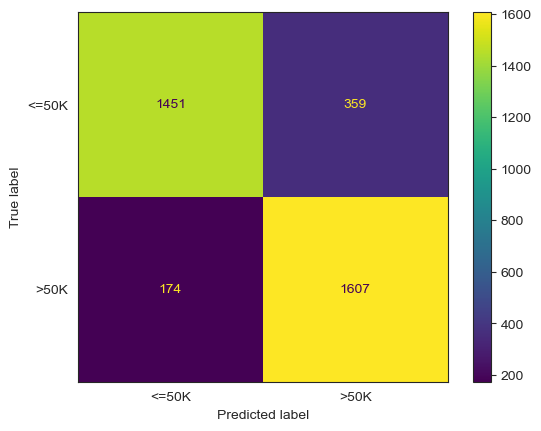

In [124]:
ConfusionMatrixDisplay.from_estimator(classifier, Rx_scaled_test, Ry_test)
plt.show()

In [125]:
Ry_pred = classifier.predict(Rx_scaled_test)
Ry_pred

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [126]:
print(classification_report(Ry_test,Ry_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.80      0.84      1810
        >50K       0.82      0.90      0.86      1781

    accuracy                           0.85      3591
   macro avg       0.86      0.85      0.85      3591
weighted avg       0.86      0.85      0.85      3591



# Combine Separate Training & Testing Scores into One Table

In [127]:
lr_train = 0.770
lr_test = 0.7741

nb_train = 0.7097
nb_test = 0.7151

knn_train = 0.8958
knn_test =  0.8439

svm_train = 0.8674
svm_test =  0.8516


# Create a list of dictionaries
results = [
    {'Model': 'Logistic Regression', 'Train Accuracy': lr_train, 'Test Accuracy': lr_test},
    {'Model': 'Naive Bayes', 'Train Accuracy': nb_train, 'Test Accuracy': nb_test},
    {'Model': 'KNN', 'Train Accuracy': knn_train, 'Test Accuracy': knn_test},
    {'Model': 'SVM', 'Train Accuracy': svm_train, 'Test Accuracy': svm_test}
    
]

# Create DataFrame
score_table = pd.DataFrame(results)
score_table

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.7700,0.7741
1,Naive Bayes,0.7097,0.7151
2,KNN,0.8958,0.8439
3,SVM,0.8674,0.8516


# Combine Separate randomsearchCV score into One Table

In [128]:
lr_CV_train = 0.770

nb_CV_train = 0.7097

knn_CV_train = 0.1

svm_CV_train = 0.9024


# Create a list of dictionaries
results = [
    {'Model': 'Logistic Regression', 'RandomizedSearchCV': lr_CV_train},
    {'Model': 'Naive Bayes', 'RandomizedSearchCV': nb_CV_train},
    {'Model': 'KNN', 'RandomizedSearchCV': knn_CV_train},
    {'Model': 'SVM', 'RandomizedSearchCV': svm_CV_train},
]

# Create DataFrame
CV_score_table = pd.DataFrame(results)
CV_score_table

,Model,RandomizedSearchCV
0,Logistic Regression,0.7700
1,Naive Bayes,0.7097
2,KNN,0.1000
3,SVM,0.9024


# Combine Separate GridsearchCV score into One Table

In [129]:
lr_grid_train = 0.770

nb_grid_train = 0.7097

knn_grid_train = 0.1

svm_grid_train = 0.9046


# Create a list of dictionaries
results = [
    {'Model': 'Logistic Regression', 'GridSearchCV': lr_grid_train},
    {'Model': 'Naive Bayes', 'GridSearchCV': nb_grid_train},
    {'Model': 'KNN', 'GridSearchCV': knn_grid_train},
    {'Model': 'SVM', 'GridSearchCV': svm_grid_train},
]

# Create DataFrame
Grid_score_table = pd.DataFrame(results)
Grid_score_table

,Model,GridSearchCV
0,Logistic Regression,0.7700
1,Naive Bayes,0.7097
2,KNN,0.1000
3,SVM,0.9046


# Compare ROC curve for all models

In [130]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [131]:
def plot_binary_roc_all(models, model_names, x_test, y_test, figsize=(7, 6)):
    # Convert string labels to binary 0/1 using get_dummies
    if y_test.dtype == 'object':
        y_test_bin = pd.get_dummies(y_test, drop_first=True).values.ravel()
    else:
        y_test_bin = y_test

    plt.figure(figsize=(5,5))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    for model, name in zip(models, model_names):
        # Use predict_proba only (assumes models support this)
        probs = model.predict_proba(x_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_bin, probs)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison (Binary Classification)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    sns.despine()
    plt.show()

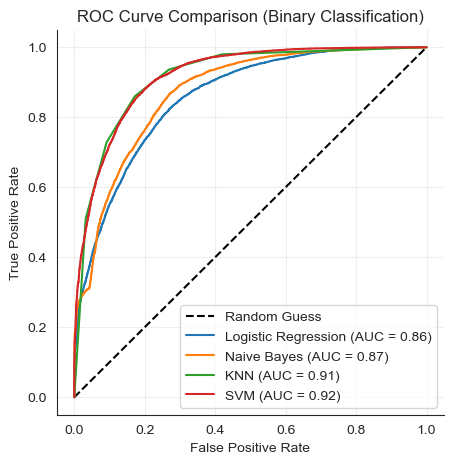

In [133]:
plot_binary_roc_all(models=[lr, naive_bayes,knn,classifier],
    model_names=['Logistic Regression', 'Naive Bayes','KNN','SVM'],
    x_test = x_scaled_test,
    y_test = y_test)